In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving salary.csv to salary.csv


In [ ]:
dataset=pd.read_csv('salary.csv')

In [ ]:
print(dataset.shape)
print(dataset.head(5))

(32561, 5)
   age  education.num  capital.gain  hours.per.week income
0   90              9             0              40  <=50K
1   82              9             0              18  <=50K
2   66             10             0              40  <=50K
3   54              4             0              40  <=50K
4   41             10             0              40  <=50K


In [ ]:
income_set=set(dataset['income'])
dataset['income']=dataset['income'].map({'<=50K':0,'>50K':1}).astype(int)
print(dataset.head(10))

   age  education.num  capital.gain  hours.per.week  income
0   90              9             0              40       0
1   82              9             0              18       0
2   66             10             0              40       0
3   54              4             0              40       0
4   41             10             0              40       0
5   34              9             0              45       0
6   38              6             0              40       0
7   74             16             0              20       1
8   68              9             0              40       0
9   41             10             0              60       1


In [ ]:
X=dataset.iloc[:,:-1].values
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]])

In [ ]:
Y=dataset.iloc[:,-1].values
Y

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

Text(0, 0.5, 'Mean Error')

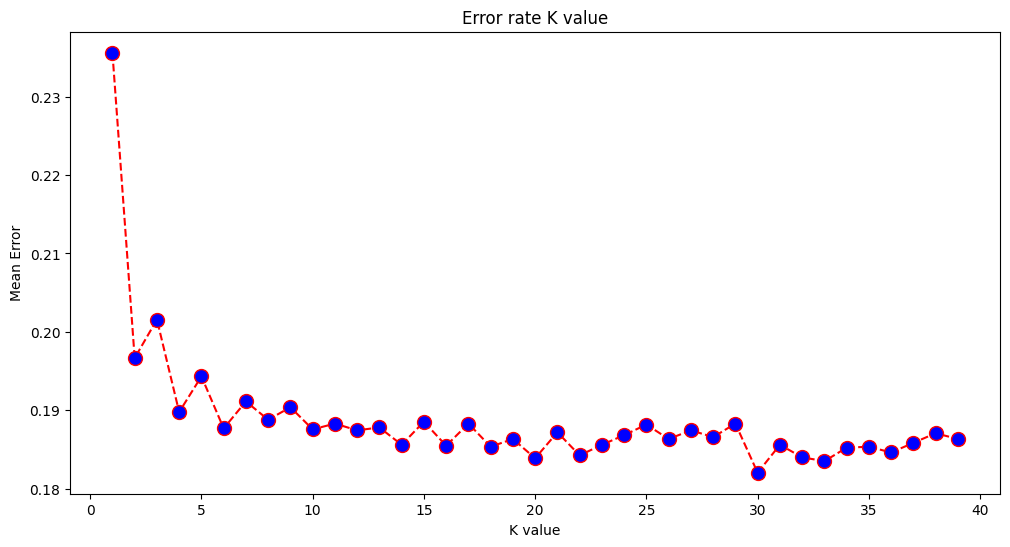

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
error=[]
for i in range (1,40):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train,Y_train)
  pred_i=model.predict(X_test)
  error.append(np.mean(pred_i!=Y_test))
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error rate K value')
plt.xlabel('K value')
plt.ylabel('Mean Error')


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=15,metric='minkowski',p=2)
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
age=int(input("enter age: "))
education=int(input("enter education number: "))
cap_gain=int(input("enter the capital gains: "))
Work_hrs=int(input("enter the working hours: "))
newEmp=[[age,education,cap_gain,Work_hrs]]
result=model.predict(sc.transform(newEmp))
if result==1:
  print("gets more than 50K")
if result==0:
  print("gets less than 50K")


enter age: 22
enter education number: 6
enter the capital gains: 15
enter the working hours: 20
gets less than 50K


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm= confusion_matrix(Y_test,model.predict(X_test))
print("confusion matrix: ")
print(cm)
print("accuracy of the model :{0}%".format(accuracy_score(Y_test,model.predict(X_test))*100))

confusion matrix: 
[[5797  396]
 [1139  809]]
accuracy of the model :81.14482250337797%
